# Executive Summary

## Research Questions
Here we will be looking at customer data from a store that carries multiple categories of items and try to understand if there are any trends in shopping patterns or marketing campaign coupon usages. <br> <br> We have been given 4 different datasets about our customer base:
1. Customer Profile: This dataset gives information about the customer such as their birth year, marital status, income, if they have kids and how often they visited the website
2. Customer Purchase Types: This dataset gives information about how the customer is shopping (in store, online, catalog) and if they purchased any deals
3. Customer Marketing Campaign Usage: This dataset includes yes/no information about coupon usage from each marketing campaign. It only contains customers that have used a marketing campaign coupon.
4. Customer Spends: This data set gives the amount spent in each category for each customer over the last 2 years

## Research Questions
Using the data described above, we want to investigate the following questions in order to gain a better understanding of our customer base and the business
1. Do those that have children spend more than those that don't? Does it vary based on if they have kids or teens?
2. Do those who visit the website more order online more? Do they spend more in general?
4. How does wine spend vary by marital status? What about by Children? 


## Results Summary
In the below analysis, we import, clean and explore our data in order to answer the above research questions. Through this process we discovered that: 
1. Customers without kids are more likely to spend the most, followed by customers with teens. Customers with kids spend the least
2. Visiting the website does not have a strong correlation with ordering online or with spending more. 
3. Wine spend does not vary much by Marital Status, but those with less children are more likely to spend more on wine than those with more children. 

Read through the report to see the analysis and visuals that support these results.

# Analysis

## Data Upload and Merging

In [1]:
# import libraries 
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import datetime
from datetime import datetime
#os.getcwd()

In [2]:
# Importing datasets
CustomerProfile = pd.read_csv('CustomerProfile.csv')
CustomerPurchaseTypes = pd.read_csv('CustomerPurchaseTypes.csv')
CustomerSpends = pd.read_csv('CustomerSpends.csv')
CustomerMarketingCampaignUsage = pd.read_csv('CustomerMarketingCampaignUsage.csv')

In [3]:
# preview data sets
CustomerProfile.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer
0,1826,1970,Divorced,"$84,835.00",0,0,6/16/2014
1,1,1961,Single,"$57,091.00",0,0,6/15/2014
2,10476,1958,Married,"$67,267.00",0,1,5/13/2014
3,1386,1967,Together,"$32,474.00",1,1,5/11/2014
4,5371,1989,Single,"$21,474.00",1,0,4/8/2014


In [4]:
CustomerPurchaseTypes.head()

,ID,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1826,1,4,4,6,1
1,1,1,7,3,7,5
2,10476,1,3,2,5,2
3,1386,1,1,0,2,7
4,5371,2,3,1,2,7


In [5]:
CustomerSpends.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1826,189,104,379,111,189,218
1,1,464,5,64,7,0,37
2,10476,134,11,59,15,2,30
3,1386,10,0,1,0,0,0
4,5371,6,16,24,11,0,34


In [6]:
CustomerMarketingCampaignUsage.head()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6
0,1826,0,0,0,0,0,1
1,7348,0,0,0,0,0,1
2,10530,0,0,0,0,0,1
3,10521,0,0,0,0,0,1
4,5585,0,0,0,0,0,1


In [7]:
# Merging datasets
# each data set is based on the customer ID so we will use that as the join
# we know that CustomerProfile, CustomerPurchaseTypes and CustomerSpends files each contain all the customers
Merge1 = pd.merge(CustomerProfile, CustomerPurchaseTypes, on='ID', how='inner')
Merge2 = pd.merge(Merge1, CustomerSpends, on='ID', how='inner')
# CustomerMarketingCampaignUsage only contains customers that applied a marketing coupon, therefore will use left join
CustomerCombined = pd.merge(Merge2, CustomerMarketingCampaignUsage, on='ID', how='left').fillna(0)

In [8]:
CustomerCombined.columns

Index(['ID', 'Year_Birth', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6'],
      dtype='object')

In [9]:
CustomerCombined.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6
0,1826,1970,Divorced,"$84,835.00",0,0,6/16/2014,1,4,4,...,379,111,189,218,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1961,Single,"$57,091.00",0,0,6/15/2014,1,7,3,...,64,7,0,37,0.0,1.0,0.0,0.0,0.0,1.0
2,10476,1958,Married,"$67,267.00",0,1,5/13/2014,1,3,2,...,59,15,2,30,0.0,0.0,0.0,0.0,0.0,0.0
3,1386,1967,Together,"$32,474.00",1,1,5/11/2014,1,1,0,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5371,1989,Single,"$21,474.00",1,0,4/8/2014,2,3,1,...,24,11,0,34,0.0,0.0,1.0,0.0,0.0,1.0


#### Data Descriptions
Definition for each variable, along with example values

1. ID: Unique Customer ID. This is the primary key that can be used to identify certain rows. <br>
    -  Example Values: 340, 8805, 10623
2. Year_Birth: Customer birth year. Used to gauge customer age. <br>
    - Example Values: 1970, 1958
4. Marital_Status: Customer Marital Status. <br>
    -  Example Values: Married, Single, Divorced, Windowed, Together
5. Income: Customer Income in Dollars. <br>
    -  Example Values: 84835, 43456
6. Kidhome: Number of kids in the customers household. <br>
    -  Example Values: 0, 1, 2
7. Teenhome: Number of teens in the customers household. <br>
    -  Example Values: 0, 1, 2
8. Dt_Customer: Date customer enrolled in company reward system. <br>
    -  Example Values: 4/8/2014, 3/15/2013
9. NumDealsPurchases: Number of purchases made with a discount. <br>
    -  Example Values: 1, 4, 7
10. NumWebPurchases: Number of purchases made on the website. <br>
    -  Example Values: 1, 3, 7
11. NumCatalogPurchases: Number of purchases made from the catalog. <br>
    -  Example Values: 2, 0, 6
12. NumStorePurchases: Number of purchases made in store. <br>
    -  Example Values: 3, 7, 9
13. NumWebVisitsMonth: Number of visits to the website in the last month. <br>
    -  Example Values: 2, 4, 5
14. MntWines: Amount spent on wine in the last 2 years. <br>
    -  Example Values: 431, 275, 80
15. MntFruits: Amount spent on fruit in the last 2 years. <br>
    -  Example Values: 104, 5, 82
16. MntMeatProducts: Amount spent on meat in the last 2 years. <br>
    -  Example Values: 11, 57, 535
17. MntFishProducts: Amount spent on fish in the last 2 years. <br>
    -  Example Values: 0, 111, 21
18. MntSweetProducts: Amount spend on sweets in the last 2 years. <br>
    -  Example Values: 20, 8, 32
19. MntGoldProds: Amount spend on gold in the last 2 years. <br>
    -  Example Values: 65, 218, 44
20. AcceptedCmp1: 1 if customer used coupon offer from campaign, 0 if customer did not. <br>
    -  Example Values: 0, 1
21. AcceptedCmp2: 1 if customer used coupon offer from campaign, 0 if customer did not. <br>
    -  Example Values: 0, 1
22. AcceptedCmp3: 1 if customer used coupon offer from campaign, 0 if customer did not. <br>
    -  Example Values: 0, 1
23. AcceptedCmp4: 1 if customer used coupon offer from campaign, 0 if customer did not. <br>
    -  Example Values: 0, 1
24. AcceptedCmp5: 1 if customer used coupon offer from campaign, 0 if customer did not. <br>
    -  Example Values: 0, 1
25. AcceptedCmp6: 1 if customer used coupon offer from campaign, 0 if customer did not. <br>
    -  Example Values: 0, 1


## Data Formatting
In this section we will check to see if the data formats imported properly and fix any that need adjustments. We also will add relevant columns and make sure that we don't have any missing values. 

In [10]:
# Check how data types imported
CustomerCombined.dtypes

ID                       int64
Year_Birth               int64
Marital_Status          object
 Income                 object
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
AcceptedCmp1           float64
AcceptedCmp2           float64
AcceptedCmp3           float64
AcceptedCmp4           float64
AcceptedCmp5           float64
AcceptedCmp6           float64
dtype: object

In [11]:
# Column Adjustments
# Income column name has a space in front of the word income, removing space
CustomerCombined.columns = CustomerCombined.columns.str.replace(' ','')
# Fixing data types
CustomerCombined['Income'] = CustomerCombined['Income'].str.replace('$','')
CustomerCombined['Income'] = CustomerCombined['Income'].str.replace(',','')
CustomerCombined['Income'] = CustomerCombined['Income'].astype('float')
CustomerCombined[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp5','AcceptedCmp6']] = CustomerCombined[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp5','AcceptedCmp6']].astype('bool')
CustomerCombined['Dt_Customer'] = CustomerCombined['Dt_Customer'].astype('str')
CustomerCombined['Dt_Customer'] = pd.to_datetime(CustomerCombined['Dt_Customer'], format = '%m/%d/%Y')
# set ID as index
CustomerCombined.set_index('ID')
# Check Data Types updated properly
CustomerCombined.dtypes

<ipython-input-11-5377d6ffb841>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  CustomerCombined['Income'] = CustomerCombined['Income'].str.replace('$','')


ID                              int64
Year_Birth                      int64
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
AcceptedCmp1                     bool
AcceptedCmp2                     bool
AcceptedCmp3                     bool
AcceptedCmp4                     bool
AcceptedCmp5                     bool
AcceptedCmp6                     bool
dtype: object

In [12]:
# combining similar columns to create summary columns
# TotalChildren adds up Kidhome and Teenhome to get the total count of children
CustomerCombined['TotalChildren'] = CustomerCombined['Kidhome'] + CustomerCombined['Teenhome']
# TotalSpend adds up the spend from each category to see how much each customer has spent over the last 2 years
Spend = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
CustomerCombined['TotalSpend'] = CustomerCombined[Spend].sum(axis=1)
# TotalPurchases adds up the purchase counts from each type of purchase (Web, Catalog, Store) to see the total purchase counts
Purchases = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
CustomerCombined['TotalPurchases'] = CustomerCombined[Purchases].sum(axis=1)
# TotalOffersAccepted counts how many offers from marketing campaigns each customer has redeemed
Offers = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'AcceptedCmp6']
CustomerCombined['TotalOffersAccepted'] = CustomerCombined[Offers].sum(axis=1)

# Formatting age as a date
CustomerCombined['Age'] = datetime.now().year - CustomerCombined['Year_Birth']

# recoding Marital_Status values
CustomerCombined['Marital_Status'] = np.where(CustomerCombined.Marital_Status=='Alone','Single',np.where(CustomerCombined.Marital_Status=='Absurd','Single',np.where(CustomerCombined.Marital_Status=='YOLO','Single',CustomerCombined['Marital_Status'])))

# bining website activity levels
CustomerCombined['WebsiteVisitQuartile'] = pd.qcut(CustomerCombined['NumWebVisitsMonth'],4,labels=['First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile'])

In [13]:
# do we have any missing values? 
CustomerCombined.isnull().sum()

ID                       0
Year_Birth               0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer              0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
AcceptedCmp1             0
AcceptedCmp2             0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp6             0
TotalChildren            0
TotalSpend               0
TotalPurchases           0
TotalOffersAccepted      0
Age                      0
WebsiteVisitQuartile     0
dtype: int64

In [14]:
# we have 24 blanks in the income column. 
# don't want to impute with median or mean since income determines a lot about ones life stype and can fluctuate a lot
# also is not a large percent of our data so okay to drop
CustomerCombined = CustomerCombined.dropna()

In [15]:
# save a copy of this combined file before you start additional cleaning so you have an original copy of the combined data
# CustomerCombined.to_csv('CustomerCombinedNoBlanks.csv')

## Data Exploration
In this section we will look at our variables in order to get a better understanding of our data and to check for outliers. We will start off with a general overview of our variables to begin to get a better sense of them. After that, we will dive deeper into our continuous variables and our categorical variables. 

#### Part 1: General Overview

In [16]:
CustomerCombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2216 non-null   int64         
 1   Year_Birth            2216 non-null   int64         
 2   Marital_Status        2216 non-null   object        
 3   Income                2216 non-null   float64       
 4   Kidhome               2216 non-null   int64         
 5   Teenhome              2216 non-null   int64         
 6   Dt_Customer           2216 non-null   datetime64[ns]
 7   NumDealsPurchases     2216 non-null   int64         
 8   NumWebPurchases       2216 non-null   int64         
 9   NumCatalogPurchases   2216 non-null   int64         
 10  NumStorePurchases     2216 non-null   int64         
 11  NumWebVisitsMonth     2216 non-null   int64         
 12  MntWines              2216 non-null   int64         
 13  MntFruits         

In [17]:
# Numerical Values Summary Statistics
pd.set_option('display.float_format', lambda x: '%.2f' % x)
CustomerCombined.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.00,5588.35,3249.38,0.00,2814.75,5458.50,8421.75,11191.00
Year_Birth,2216.00,1968.82,11.99,1893.00,1959.00,1970.00,1977.00,1996.00
Income,2216.00,52247.25,25173.08,1730.00,35303.00,51381.50,68522.00,666666.00
Kidhome,2216.00,0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,2216.00,0.51,0.54,0.00,0.00,0.00,1.00,2.00
NumDealsPurchases,2216.00,2.32,1.92,0.00,1.00,2.00,3.00,15.00
NumWebPurchases,2216.00,4.09,2.74,0.00,2.00,4.00,6.00,27.00
NumCatalogPurchases,2216.00,2.67,2.93,0.00,0.00,2.00,4.00,28.00
NumStorePurchases,2216.00,5.80,3.25,0.00,3.00,5.00,8.00,13.00
NumWebVisitsMonth,2216.00,5.32,2.43,0.00,3.00,6.00,7.00,20.00


In [18]:
# Does it make sense that the TotalPurchases min is 0? How are they a customer if they have no purchases?
ZeroTotalPurchases = CustomerCombined.loc[CustomerCombined['TotalPurchases'] == 0]
ZeroTotalPurchases[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'TotalSpend','TotalPurchases']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalSpend,TotalPurchases
456,2,1,1,1,0,1,0,0,0,6,0
663,5,0,1,1,1,1,0,0,0,9,0
1291,2,1,1,0,0,1,0,0,0,5,0
1466,1,1,3,1,1,1,0,0,0,8,0
1826,1,1,1,1,1,1,0,0,0,6,0
1925,2,1,2,1,1,1,0,0,0,8,0


In [19]:
# it appears that where these purchases took place was not record, but there is purchase category data. 
# only affects 6 customers
# Since the spend from these customers is very low, I am going to remove them from my analysis as they are not top customers
CustomerCombined = CustomerCombined.loc[CustomerCombined['TotalPurchases'] != 0]

In [20]:
# how many unique values does each column have? 
CustomerCombined.nunique()

ID                      2210
Year_Birth                59
Marital_Status             5
Income                  1968
Kidhome                    3
Teenhome                   3
Dt_Customer              662
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       14
NumStorePurchases         14
NumWebVisitsMonth         15
MntWines                 776
MntFruits                158
MntMeatProducts          554
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
AcceptedCmp1               2
AcceptedCmp2               2
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp6               2
TotalChildren              4
TotalSpend              1045
TotalPurchases            32
TotalOffersAccepted        6
Age                       59
WebsiteVisitQuartile       4
dtype: int64

In [21]:
# Breaking up continuous and categorical variables into separate dataframes to do additional exploration
# After looking at the numerical summary stats above and the counts of unique variables, I am going to plot some of my numerical values as categories to see the bar plot views
CustomerContinuous = CustomerCombined[['Year_Birth','Income','NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds','TotalSpend', 'TotalPurchases','Age']]
CustomerCategorical = CustomerCombined[['Marital_Status','Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'TotalChildren','TotalOffersAccepted', 'WebsiteVisitQuartile']]
CustomerCategorical = CustomerCategorical.astype(str)

#### Part 2: Continuous Variables

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>],
       [<AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'MntWines'}>],
       [<AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>],
       [<AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'TotalSpend'}>,
        <AxesSubplot:title={'center':'TotalPurchases'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

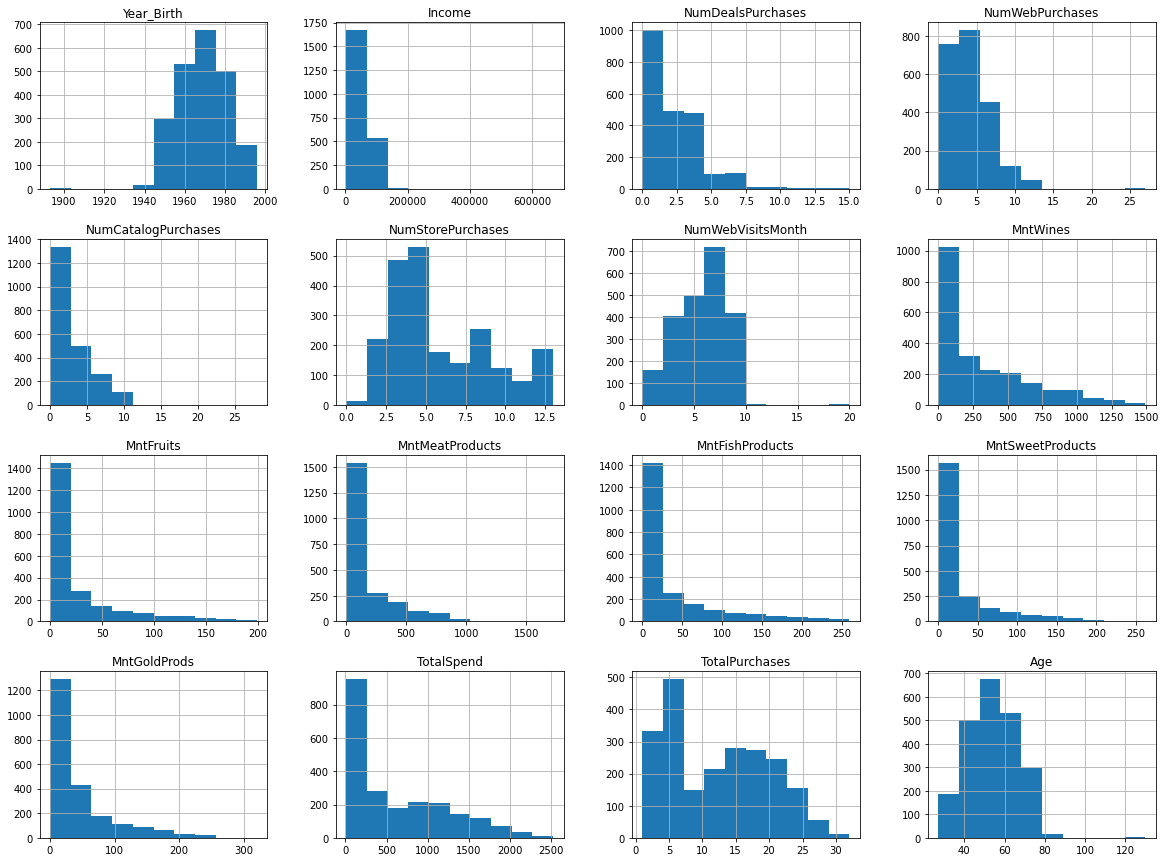

In [22]:
CustomerContinuous.hist(figsize=(20,15))

In [23]:
# look closer at Year_Birth/Age - doesn't make sense to have someone born before 1900/over 100 years old
# look closer at Income - histogram looks like there is an outlier around 600,000
# rest of histograms look good/make sense

Text(0.5, 1.0, 'Boxplot of Age')

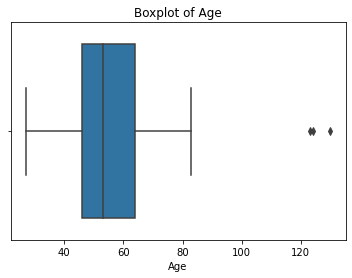

In [24]:
# box plot of age
sns.boxplot(x=CustomerCombined['Age'])
plt.title('Boxplot of Age')

In [25]:
age1 = CustomerCombined.loc[CustomerCombined['Age'] > 80]
age1[['ID', 'Year_Birth', 'Age', 'TotalSpend', 'TotalPurchases', 'TotalOffersAccepted']]

,ID,Year_Birth,Age,TotalSpend,TotalPurchases,TotalOffersAccepted
513,11004,1893,130,22,3,0
827,1150,1899,124,1853,14,1
1740,6932,1941,82,2119,22,1
2171,6663,1940,83,157,8,0
2233,7829,1900,123,65,5,0


In [26]:
# dropping customers over 100 years old for analysis because those don't make sense
# potential that those in the 1800s are typos and meant to be in the 1900s, but this is a small subset of our data so not going to have major affect on analysis 
CustomerCombined = CustomerCombined.loc[CustomerCombined['Age'] < 100]

In [27]:
# creating age buckets
Ages = CustomerCombined['Age']
Bins = [20, 30, 40, 50, 60, 70, 80, 90]
BinNames = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']
AgeBin = pd.cut(Ages, Bins, labels=BinNames, right=False)
CustomerCombined['AgeBin'] = pd.cut(x=CustomerCombined['Age'], bins=Bins, labels=BinNames, right=False)
pd.value_counts(AgeBin)

50s    638
40s    583
60s    466
70s    255
30s    247
20s     10
80s      8
Name: Age, dtype: int64

Text(0.5, 1.0, 'Boxplot of Income')

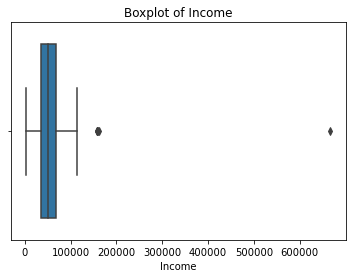

In [28]:
# income
sns.boxplot(x=CustomerCombined['Income'])
plt.title('Boxplot of Income')

In [29]:
income1 = CustomerCombined.loc[CustomerCombined['Income'] > 100000]
income1[['ID', 'Year_Birth', 'Income', 'TotalSpend', 'TotalPurchases', 'TotalOffersAccepted']].sort_values(by=['Income'],ascending=False)

,ID,Year_Birth,Income,TotalSpend,TotalPurchases,TotalOffersAccepted
527,9432,1977,666666.00,62,7,0
731,1503,1976,162397.00,107,1,0
497,1501,1982,160803.00,1717,29,0
853,5336,1971,157733.00,59,2,0
2204,8475,1973,157243.00,1608,22,0
325,4931,1977,157146.00,1730,28,0
210,4619,1945,113734.00,277,27,0
832,4611,1970,105471.00,1724,30,3
142,10089,1974,102692.00,1112,28,5
1244,2798,1977,102160.00,1240,26,4


In [30]:
# the $666,666 income seems incorrect so removing this from my dataset
CustomerCombined = CustomerCombined.loc[CustomerCombined['Income'] < 200000]

#### Part 3: Categorical Variables

In [31]:
CustomerCategorical.describe()

,Marital_Status,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,TotalChildren,TotalOffersAccepted,WebsiteVisitQuartile
count,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210
unique,5,3,3,15,15,14,14,2,2,2,2,2,2,4,6,4
top,Married,0,0,1,2,0,3,False,False,False,False,False,False,1,0,Second Quartile
freq,855,1279,1142,960,368,570,484,2068,2180,2047,2046,2048,1877,1116,1605,831


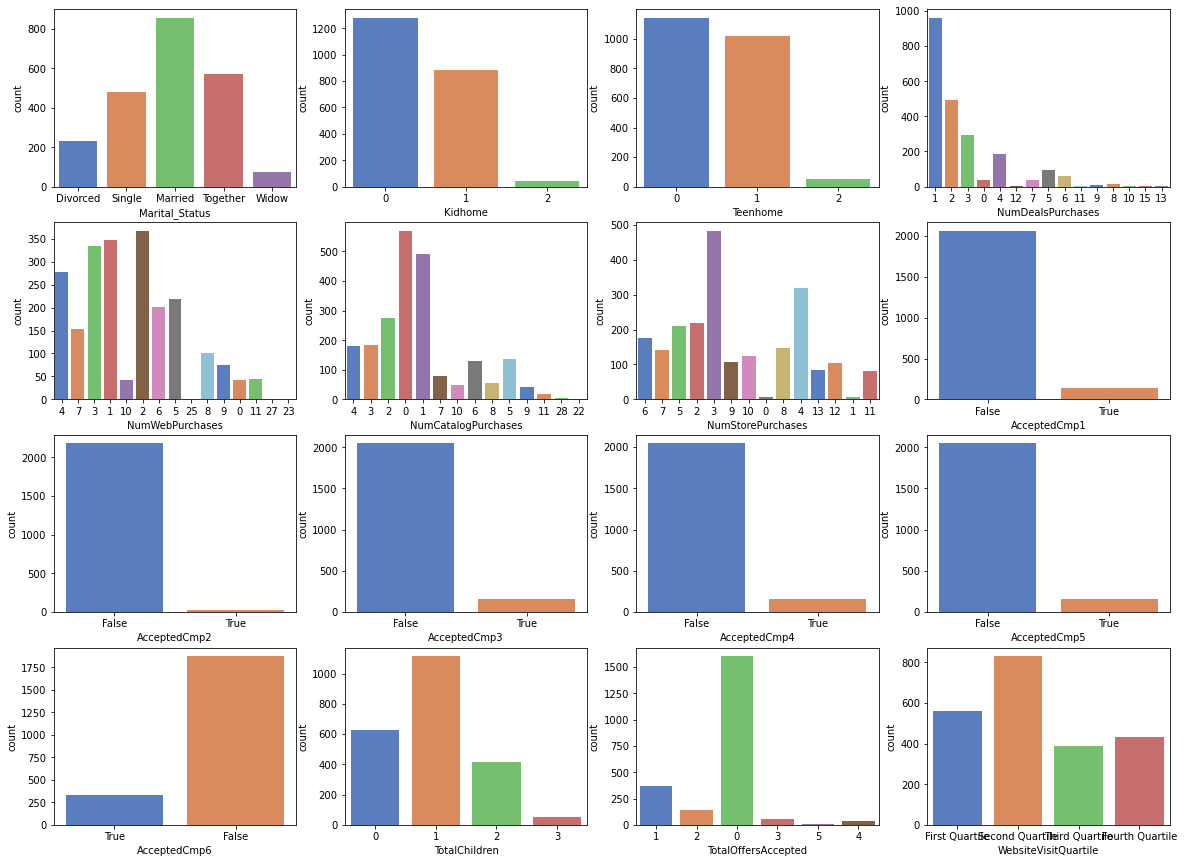

In [32]:
# bar chart of each variable
columns = CustomerCategorical.columns
ncols = len(columns)
rows = int(ncols/4)

fig, ax = plt.subplots(figsize=(20,15), nrows = rows, ncols = 4)
ax = ax.flatten()
for i, column in enumerate(columns):
    sns.countplot(x=column, data=CustomerCategorical, ax=ax[i], palette='muted')


In [34]:
# now that i am done exploring my variables and cleaning my data, saving a clean version of the data
CustomerCombined.to_csv('CustomerCombinedFinal.csv')

#### Part 4: Variable Comparison

Is there a strong relationship between income and total spend? Do those with more income, spend more? 

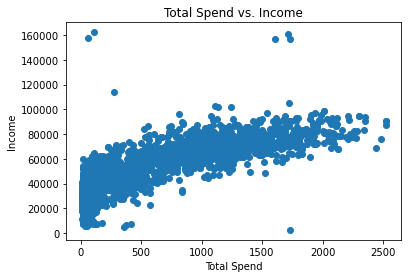

In [34]:
plt.scatter(CustomerCombined.TotalSpend,CustomerCombined.Income)
plt.title('Total Spend vs. Income')
plt.xlabel('Total Spend')
plt.ylabel('Income')
plt.show()

In [35]:
CustomerCombined.Income.corr(CustomerCombined.TotalSpend)

0.8063018244829001

Income and TotalSpend do have a strong relationship, as demonstrated by the scatterplot and the high correlation coefficient

Is there a relationship between income and campaign coupon usage? 

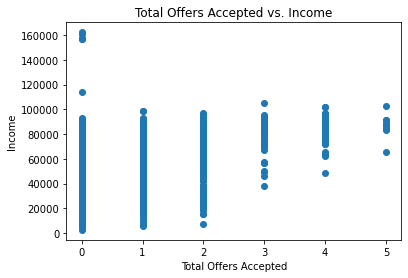

In [36]:
plt.scatter(CustomerCombined.TotalOffersAccepted,CustomerCombined.Income)
plt.title('Total Offers Accepted vs. Income')
plt.xlabel('Total Offers Accepted')
plt.ylabel('Income')
plt.show()

In [37]:
CustomerCombined.Income.corr(CustomerCombined.TotalOffersAccepted)

0.3486886842385556

The scatter plot and correlation coefficient show that there is a slightly positive relationship between Total Offers Accepted and Income. This is somewhat surprising as one may think that those with lower incomes would be more likely to redeem an offer. 

#### Part 5: Research Questions
Now that we have taken the time to understand all our variables and investigated some of the relationships between them, it is time to look at our research questions!

##### Question 1
Do those that have children spend more than those that don't? Does it vary based on if they have kids or teens?

<AxesSubplot:xlabel='TotalChildren', ylabel='TotalSpend'>

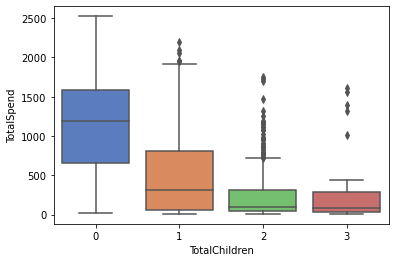

In [38]:
sns.boxplot(x='TotalChildren',y='TotalSpend',data=CustomerCombined, palette='muted')

It actually appears that those who have children spend less. For those with 0 children, the mean is above the 75% quartile line for all children counts. While this is surprising since those with no kids are probably feeding less people, these people may also buy higher priced items since they are not feeding any children. <br> <br>
Does this change at all if you factor in wether the children are kids or teens?

<AxesSubplot:xlabel='Teenhome', ylabel='TotalSpend'>

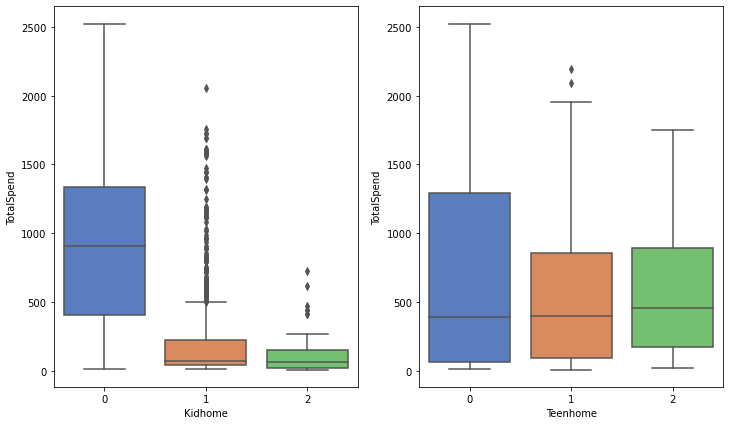

In [39]:
fig, ax = plt.subplots(figsize=(12,7), nrows = 1, ncols = 2)
ax = ax.flatten()
sns.boxplot(x='Kidhome',y='TotalSpend',data=CustomerCombined, ax=ax[0], palette='muted')
sns.boxplot(x='Teenhome',y='TotalSpend',data=CustomerCombined, ax=ax[1], palette='muted')

When looking at it broken down by kid vs teen, the box plots show that customers who have kids at home typically spend less than those without kids and those with teenagers. This makes sense as kids probably eat less than teens.

Conclusion: Overall, customers without children spend more than those with children. But when you break it down by those who have kids vs those who have teens, customers with kids spend much less than those with no children and those with teens. When looking at both kids or teens, customers spend very similarily regardless of if they have 1 or 2 kids/teens. Customers who have teens have a median spend that is very similar to customers without children, but the range of spends is much large for customers with no children so their spend can get higher. 

##### Question 2
Do those who visit the website more order online more? Do they spend more in general?

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='NumWebPurchases'>

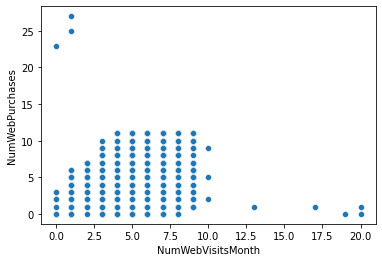

In [40]:
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=CustomerCombined)

In [41]:
WebCorrelation = CustomerCombined.NumWebPurchases.corr(CustomerCombined.NumWebVisitsMonth)
print(f'The correlation coefficient for Number of Web Purchases and Number of Web Visits per Month is {WebCorrelation:.4f}')

The correlation coefficient for Number of Web Purchases and Number of Web Visits per Month is -0.0430


There does not seem to be a correlation between visiting the website and number of web purchases. <br> Let's look at if there is a relationship between TotalSpend and Website Visits, as maybe customers are browsing the site before going to the store?

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='TotalSpend'>

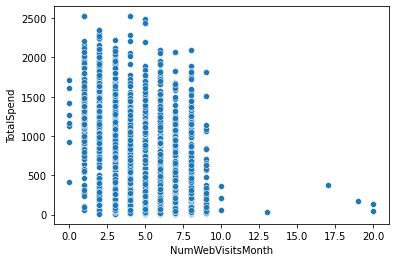

In [42]:
sns.scatterplot(x='NumWebVisitsMonth', y='TotalSpend', data=CustomerCombined)

In [43]:
WebSpendCorrelation = CustomerCombined.NumWebPurchases.corr(CustomerCombined.NumWebVisitsMonth)
print(f'The correlation coefficient for Number of Web Visits per Month and Total Spend is {WebSpendCorrelation:.4f}')

The correlation coefficient for Number of Web Visits per Month and Total Spend is -0.0430


There also does not seem to be a correlation between website visits per month and total spend.

Conculsion: Website visits per month does not have a strong correlation with either Number of Web Purchases or Total Spend.

##### Question 3
How does Wine spend vary by marital status? by number of children?

In [44]:
# marital status
grouped = CustomerCombined.MntWines.groupby(CustomerCombined.Marital_Status)
print('Mean wine spend by Marital Status')
print(grouped.mean())

Mean wine spend by Marital Status
Marital_Status
Divorced   330.46
Married    300.55
Single     292.26
Together   308.15
Widow      367.13
Name: MntWines, dtype: float64


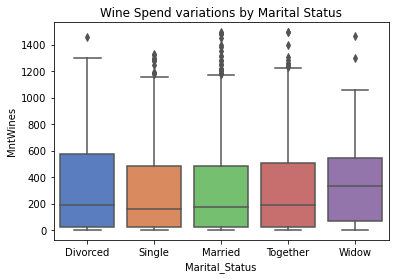

In [45]:
sns.boxplot(y='MntWines', data=CustomerCombined, x='Marital_Status', palette='muted')
plt.title('Wine Spend variations by Marital Status')
plt.show()

There is not much variation on wine spend between the different Marital Status'

In [46]:
# children
grouped = CustomerCombined.MntWines.groupby(CustomerCombined.TotalChildren)
print('Mean spend by Number of Children')
print(grouped.mean())

Mean spend by Number of Children
TotalChildren
0   490.75
1   269.45
2   142.48
3   161.34
Name: MntWines, dtype: float64


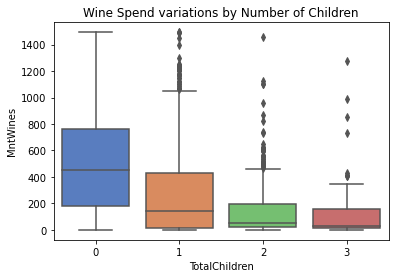

In [47]:
sns.boxplot(y='MntWines', data=CustomerCombined, x='TotalChildren', palette='muted')
plt.title('Wine Spend variations by Number of Children')
plt.show()

There is more variation in spend on wine when you break it down by the number of children the customer has. Thoes with no children spend the most on wine. This makes sense as it aligns with our discovery from Q1 that customers with no children are more likely to spend the most. Spend on wine continues to decrease as the number of children increase. The only caveat to this is that the mean spend on wine for customers with 3 children is higher than the mean spend on wine for customers with 2 children, but the 75th percentile line for customers with 3 children is lower than it is for customers with 2 children. This shows that while the mean is slightly higher for customers with 3 children, that the range of spends for 3 children is smaller than the range of spends for 2 children. 

How does wine spend vary when factoring in both maritial status and children?

In [48]:
means = CustomerCombined.MntWines.groupby([CustomerCombined.Marital_Status, CustomerCombined.TotalChildren]).mean()
df_means = DataFrame(means)
df_means = df_means.unstack(level=0)
print(df_means)

               MntWines                               
Marital_Status Divorced Married Single Together  Widow
TotalChildren                                         
0                469.62  459.22 508.32   527.87 482.73
1                349.43  277.44 199.48   263.14 398.27
2                157.53  154.46 108.89   141.93 129.88
3                 43.00  197.69 120.36   200.27    NaN


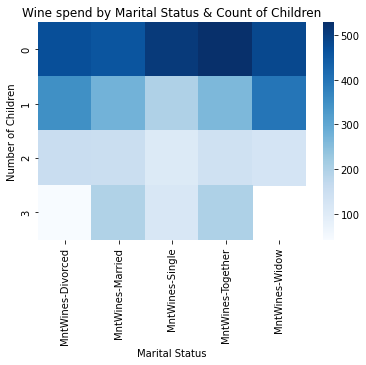

In [49]:
sns.heatmap(df_means, cmap="Blues")
plt.xlabel('Marital Status')
plt.ylabel('Number of Children')
plt.title('Wine spend by Marital Status & Count of Children')
plt.show()

Conclusion: This heat map combines our findings from the last two box plots. The dark blues mean more was spent on wine, compared to the light blues. The fact that the top row where number of children is 0 is dark blue across all marital status options reiterates that have 0 children has a larger effect on wine spend that any of our marital status options. Those that are together and have zero kids have the highest spend on wine. A next step could be to factor in age group.

## Conclusion
We were able to gain a strong understanding of the range of our data set/variables through data exploration. This set us up well to answer some deeper questions about trends that were taking place in the data. Some discoveries such as the fact that Income is strongly related to total spend were just confirming our asumption, but others such as the lack of relationship between website visits and web purchases were interesting patterns to uncover. <br>

With only a limited amount of time, we focused our deeper dive on website visits like previously mentioned, along with how children affected spend. We discovered that customers without kids are more likely to spend more, both overall and when looking at the wine category individually. For overall spend, customers that have children did start to spend more once their children hit their teens, but customers with teens still spend less than customers with no children. <br>

When looking at the wine category, looked at how both number of children and marital status affected the amount spent on wine. We determined that marital status did not have much affect. Those with zero children spent the most on wine over the last two years, regardless of their marital status. An interesting next step here could be to also look at the customer age bin. <br>

There are a lot more questions that we could answer aout the customer base and the store from this data set. Some next steps could be to get a better understand of what the customer demographic is and if the demographic varies by spend level, along with looking deeper into coupon usage from the marketing campaigns. 